In [2]:
tasmia = "In the name of Allah, The most Benoficient, The most Merciful"
print(tasmia)

In the name of Allah, The most Benoficient, The most Merciful


### Import Libraries

In [68]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import ttest_ind
sns.set_style("whitegrid")

### Import Dataset

In [4]:
df = pd.read_csv("marketing.csv")
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [5]:
df["date_served"] = pd.to_datetime(df["date_served"])
df["date_subscribed"] = pd.to_datetime(df["date_subscribed"])
df["date_canceled"] = pd.to_datetime(df["date_canceled"])

**Data Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


**Data Statistics**

In [7]:
df.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


**Create New Column**

In [8]:
def house_ads(x):
    if x == "House Ads":
        return True
    else:
        return False
    
df["is_house_ads"] = df["marketing_channel"].apply(house_ads)

In [9]:
def correct_language(x):
    preferred = x[0]
    displayed = x[1]  
    if preferred == displayed:
        return "Yes"
    else:
        return "No"
    
df["is_correct_language"] = df[["language_preferred", "language_displayed"]].apply(correct_language, axis = 1)

**Extract Days**

In [10]:
df["day_served"] = df["date_served"].dt.dayofweek

**Unique users by Date Served**

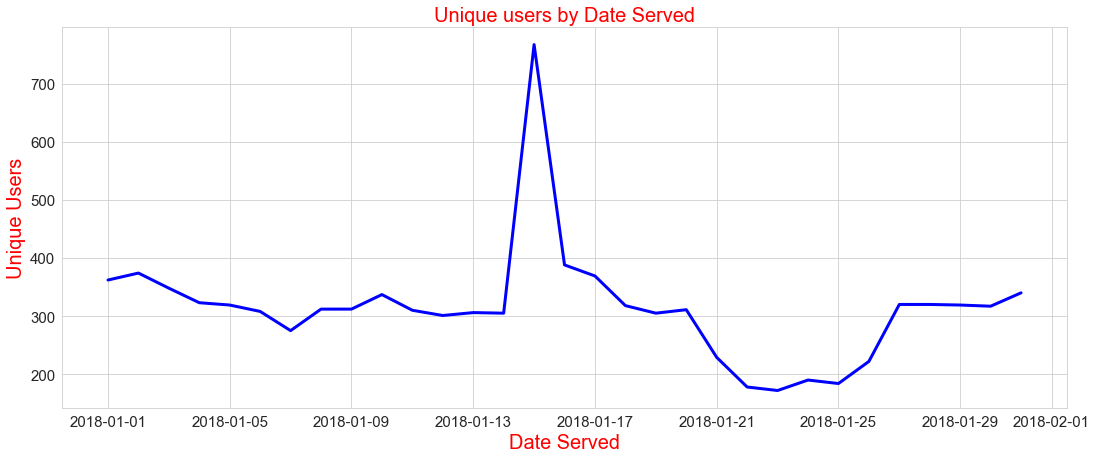

In [11]:
daily_users = df.groupby("date_served")["user_id"].nunique().to_frame()
plt.figure(figsize = (18, 7))
sns.lineplot(x = daily_users.index, y = "user_id", data = daily_users, color = "blue", linewidth = 3)
plt.title("Unique users by Date Served", size = 20, color = "red")
plt.xlabel("Date Served", color = "red", size = 20)
plt.ylabel("Unique Users", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Conversion Rate**

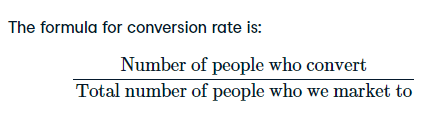

In [12]:
people = df["user_id"].nunique()
print("Number of unique people =", people)

Number of unique people = 7309


In [13]:
subscribers = df.groupby("converted")["user_id"].nunique()
subscribers

converted
False    6854
True     1015
Name: user_id, dtype: int64

In [14]:
conversion = subscribers[1] / people
print("Conversion Rate =", (conversion*100).round(2), "%")

Conversion Rate = 13.89 %


**Retention Rate**

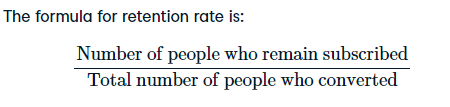

In [15]:
retained = df.groupby("is_retained")["user_id"].nunique()
retained

is_retained
False    350
True     678
Name: user_id, dtype: int64

In [16]:
retention_rate = (retained[1] / subscribers[1]) * 100
print("Retention Rate =", retention_rate.round(2), "%")

Retention Rate = 66.8 %


### Customer Segmentation

**Housing Ads**

In [17]:
housing_ads = df[df["subscribing_channel"] == "House Ads"]
housing_ads.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,is_correct_language,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0


**Conversion Rate by House Ads**

In [18]:
people = housing_ads["user_id"].nunique()
print("House Ads reached to total people =", people)

House Ads reached to total people = 298


In [19]:
subscription = housing_ads.groupby("converted")["user_id"].nunique()
subscription

converted
False     56
True     298
Name: user_id, dtype: int64

In [20]:
conversion_rate = (subscription[1] / people) * 100
print("Conversion Rate by House Ads =", conversion_rate, "%")

Conversion Rate by House Ads = 100.0 %


**Retention Rate by House Ads**

In [21]:
retained = housing_ads.groupby("is_retained")["user_id"].nunique()
retained

is_retained
False    125
True     173
Name: user_id, dtype: int64

In [22]:
retention_rate = (retained[1] / subscription[1]) * 100
print("Retention Rate by House Ads =", retention_rate.round(2), "%")

Retention Rate by House Ads = 58.05 %


### Subscribing Channels

**Converted Customers by All Channels**

In [23]:
converted_true = df[df["converted"] == True]

In [24]:
conversion = converted_true.groupby("subscribing_channel")["user_id"].nunique()
conversion

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

**Retention Customers by All Channels**

In [25]:
retain_true = df[df["is_retained"] == True]

In [26]:
retained = retain_true.groupby("subscribing_channel")["user_id"].nunique()
retained

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

**Retention Rate By All Subscribing Channels**

In [27]:
(retained / conversion*100).round(2)

subscribing_channel
Email        87.58
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64

### English Language Displayed

**Conversion Rate by English Language**

In [28]:
english = df[(df["language_displayed"] == "English")]

In [29]:
people = english["user_id"].nunique()
print("People Subscribed through English Language =", people)

People Subscribed through English Language = 7169


In [30]:
conversion = english.groupby("converted")["user_id"].nunique()
conversion

converted
False    6778
True      926
Name: user_id, dtype: int64

In [31]:
# Conversiom Rate
conversion_rate = ((conversion[1] / people) * 100).round(2)
print("Conversion Rate by English Language =", conversion_rate, "%")

Conversion Rate by English Language = 12.92 %


**Retention Rate by English Language**

In [32]:
retention = english.groupby("is_retained")["user_id"].nunique()
retention

is_retained
False    320
True     619
Name: user_id, dtype: int64

In [33]:
print("Retention Rate by English Language =", (retention[1] / conversion[1] * 100).round(2), "%")

Retention Rate by English Language = 66.85 %


### Conversion by Languages

In [34]:
people = df.groupby("language_displayed")["user_id"].nunique()
people

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64

In [35]:
converted = df[df["converted"] == True]
subscription = converted.groupby("language_displayed")["user_id"].nunique()
subscription

language_displayed
Arabic      12
English    926
German      53
Spanish     24
Name: user_id, dtype: int64

**Conversion Rate**

In [36]:
((subscription/people) * 100).round(2)

language_displayed
Arabic     50.00
English    12.92
German     71.62
Spanish    20.00
Name: user_id, dtype: float64

### Aggregating by date

In [37]:
total = df.groupby("date_served")["user_id"].nunique()

subscription = df[df["converted"] == True].groupby("date_served")["user_id"].nunique()

conversion = ((subscription / total) * 100).round(2)
conversion

date_served
2018-01-01     9.94
2018-01-02     9.89
2018-01-03    10.34
2018-01-04    10.84
2018-01-05    12.54
2018-01-06    11.36
2018-01-07    14.18
2018-01-08    11.54
2018-01-09    12.50
2018-01-10    11.87
2018-01-11     8.06
2018-01-12     7.64
2018-01-13     8.50
2018-01-14     8.52
2018-01-15    11.34
2018-01-16    25.52
2018-01-17    21.95
2018-01-18     9.12
2018-01-19     5.90
2018-01-20     6.75
2018-01-21     8.73
2018-01-22    12.36
2018-01-23    12.21
2018-01-24    11.58
2018-01-25    12.50
2018-01-26     9.01
2018-01-27     6.56
2018-01-28     6.25
2018-01-29     5.96
2018-01-30     6.62
2018-01-31     5.29
Name: user_id, dtype: float64

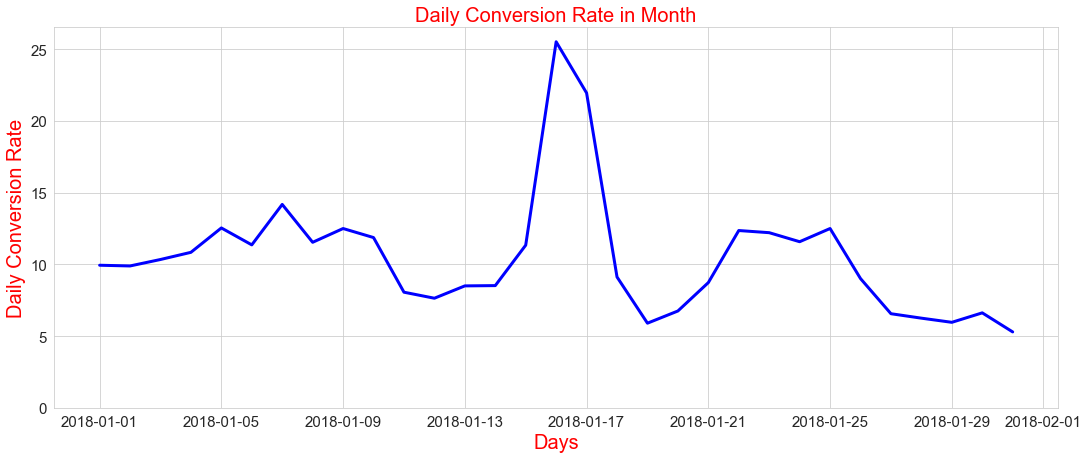

In [38]:
df_conversion = pd.DataFrame(conversion).reset_index()
df_conversion.columns = ["date_subscribed", "conversion_rate"] 
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_subscribed", y = "conversion_rate", data = df_conversion, color = "blue", linewidth = 3)
plt.title("Daily Conversion Rate in Month", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Days", color = "red", size = 20)
plt.ylabel("Daily Conversion Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

### Calculate Subscribers Quality

In [39]:
total = df.groupby("date_subscribed")["user_id"].nunique()

retained = df[df["is_retained"] == True].groupby("date_subscribed")["user_id"].nunique()

daily_retention_rate = retained / total
daily_retention_rate

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64

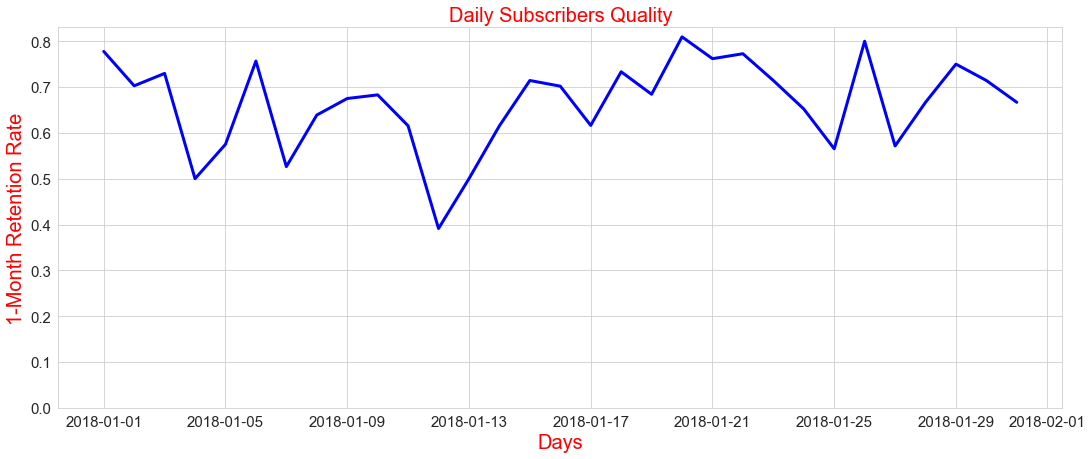

In [40]:
df_daily_retention_rate = pd.DataFrame(daily_retention_rate).reset_index()
df_daily_retention_rate.columns = ["date_subscribed", "retention_rate"] 
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_subscribed", y = "retention_rate", data = df_daily_retention_rate, color = "blue", linewidth = 3)
plt.title("Daily Subscribers Quality", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Days", color = "red", size = 20)
plt.ylabel("1-Month Retention Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

### Grouping by Multiple Columns

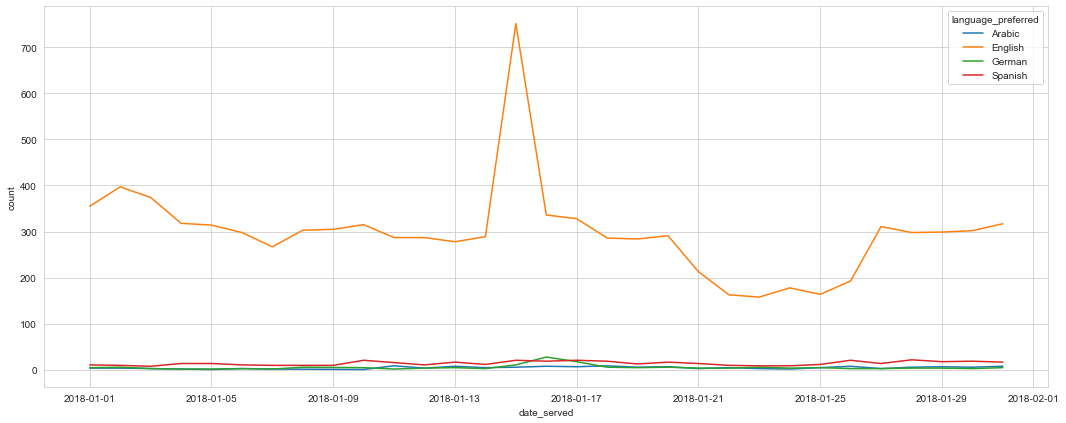

In [41]:
language = df.groupby(["date_served", "language_preferred"])["user_id"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_served", y = "count", hue = "language_preferred", data = language)
plt.show()

In [42]:
pivot_language = pd.pivot_table(language, index = "date_served", columns = "language_preferred", values = "count")
pivot_language["Total"] = pivot_language.sum(axis = 1)
pivot_language

language_preferred,Arabic,English,German,Spanish,Total
date_served,,,,,
2018-01-01,4.0,355.0,5.0,11.0,375.0
2018-01-02,4.0,397.0,6.0,10.0,417.0
2018-01-03,3.0,374.0,3.0,8.0,388.0
2018-01-04,2.0,318.0,2.0,14.0,336.0
2018-01-05,1.0,314.0,2.0,14.0,331.0
2018-01-06,3.0,298.0,3.0,11.0,315.0
2018-01-07,2.0,267.0,2.0,10.0,281.0
2018-01-08,NaN,303.0,6.0,10.0,319.0
2018-01-09,NaN,305.0,NaN,10.0,315.0


### Marketing Channel reach to people by age group

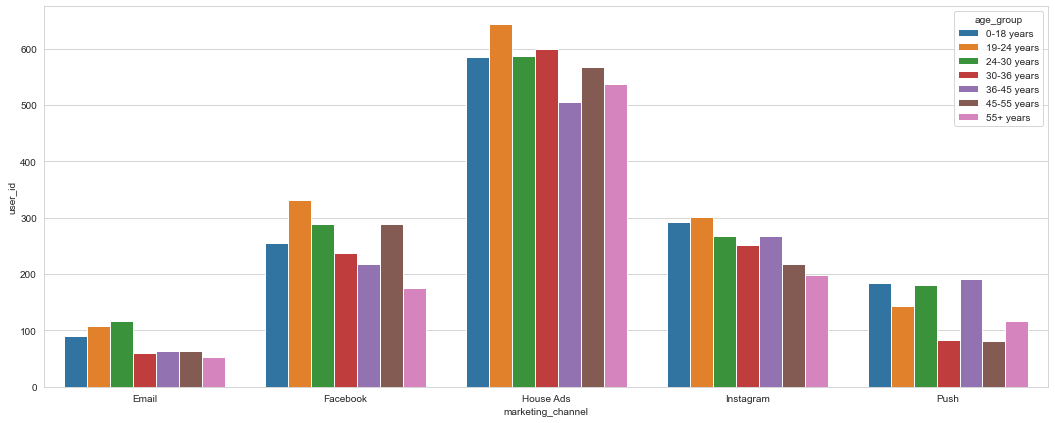

In [43]:
mpa = df.groupby(["marketing_channel", "age_group"])["user_id"].nunique().to_frame().reset_index()
plt.figure(figsize = (18, 7))
sns.barplot(x = "marketing_channel", y = "user_id", hue = "age_group", data = mpa)
plt.show()

**Count the subs by subscribing channel and date subscribed**

In [44]:
retention_total = df.groupby(["date_subscribed", "subscribing_channel"])["user_id"].nunique()

retained = df[df["is_retained"] == True].groupby(["date_subscribed", "subscribing_channel"])["user_id"].nunique()

retention_rate = ((retained / retention_total) * 100).round(2)

df_retention_rate = retention_rate.to_frame().reset_index()
pd.pivot_table(df_retention_rate, index = "date_subscribed", columns = "subscribing_channel", values = "user_id")

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,100.00,87.50,68.75,75.00,100.00
2018-01-02,75.00,100.00,58.82,62.50,100.00
2018-01-03,NaN,80.00,64.71,90.91,66.67
2018-01-04,50.00,66.67,46.67,50.00,NaN
2018-01-05,100.00,57.14,50.00,63.64,100.00
2018-01-06,80.00,57.14,94.12,50.00,50.00
2018-01-07,50.00,75.00,52.63,40.00,66.67
2018-01-08,NaN,88.89,50.00,62.50,100.00
2018-01-09,50.00,28.57,85.00,66.67,50.00


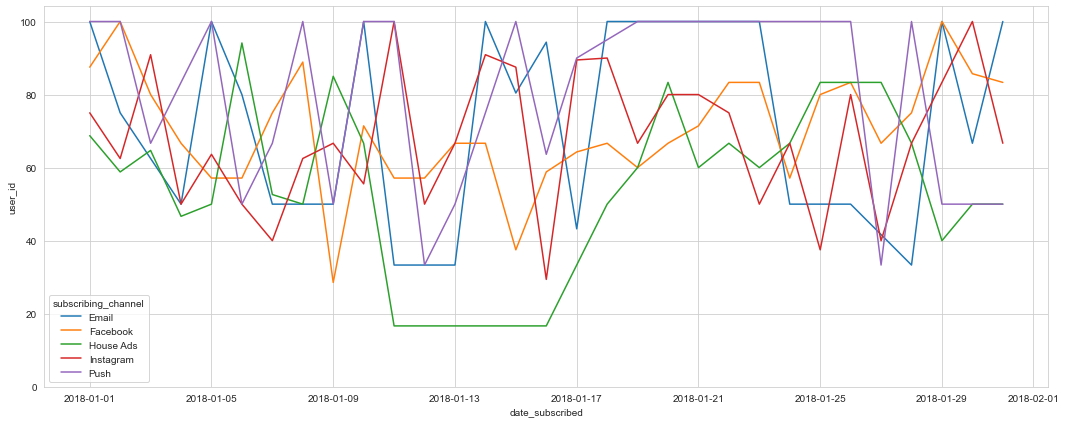

In [45]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_subscribed", y = "user_id", hue = "subscribing_channel", data = df_retention_rate)
plt.ylim(0)
plt.show()

### Marketing Channel Conversion Rates

In [46]:
people = df.groupby(["date_served", "marketing_channel"])["user_id"].nunique()

converted_people = df[df["converted"] == True].groupby(["date_served", "marketing_channel"])["user_id"].nunique()

conversion_rate = converted_people / people
df_conversion_rate = conversion_rate.to_frame().reset_index()
df_conversion_rate.columns = ["date_served", "marketing_channel", "users"]

**Conversion Rate by Email**

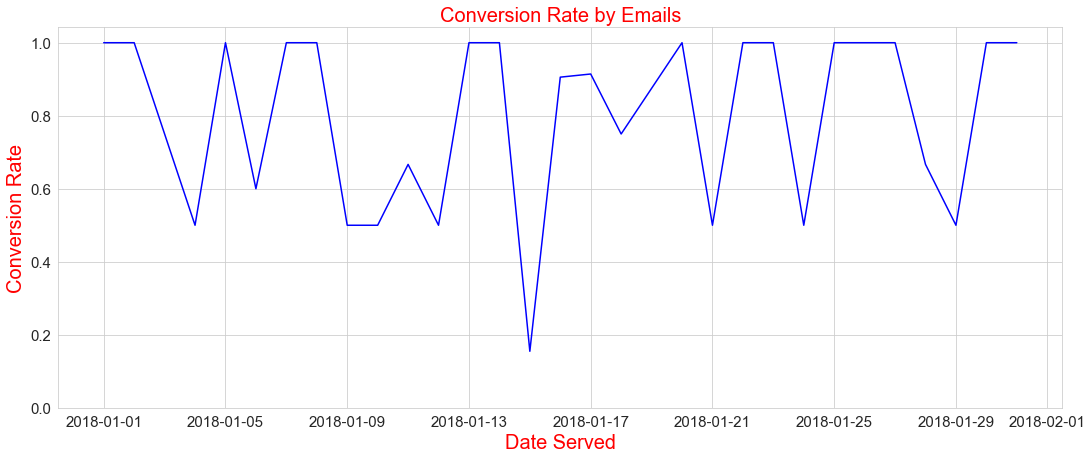

In [47]:
email_df_conversion_rate = df_conversion_rate[df_conversion_rate["marketing_channel"] == "Email"]
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_served", y = "users", data = email_df_conversion_rate, color = "blue")
plt.title("Conversion Rate by Emails", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date Served", size = 20, color = "red")
plt.ylabel("Conversion Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

**Conversion Rate by Facebook**

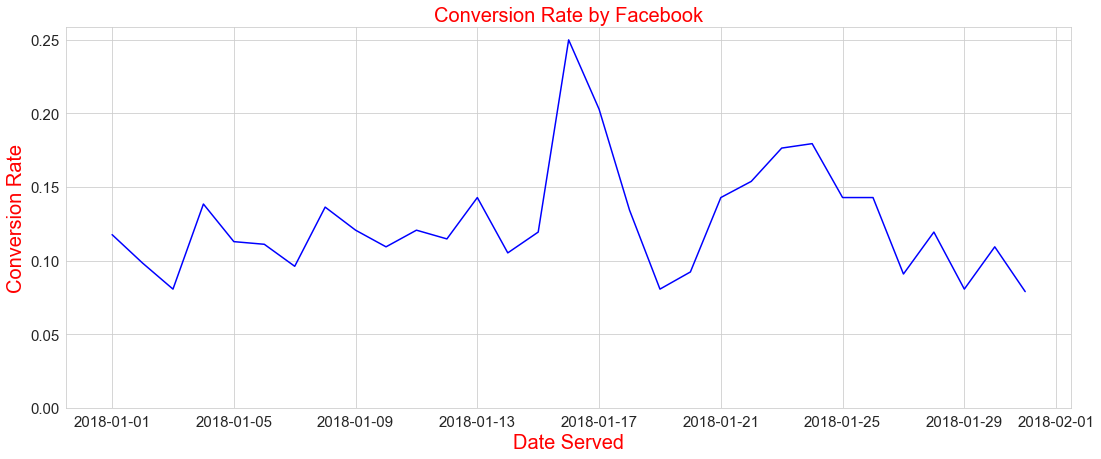

In [48]:
email_df_conversion_rate = df_conversion_rate[df_conversion_rate["marketing_channel"] == "Facebook"]
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_served", y = "users", data = email_df_conversion_rate, color = "blue")
plt.title("Conversion Rate by Facebook", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date Served", size = 20, color = "red")
plt.ylabel("Conversion Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

**Conversion Rate by House Ads**

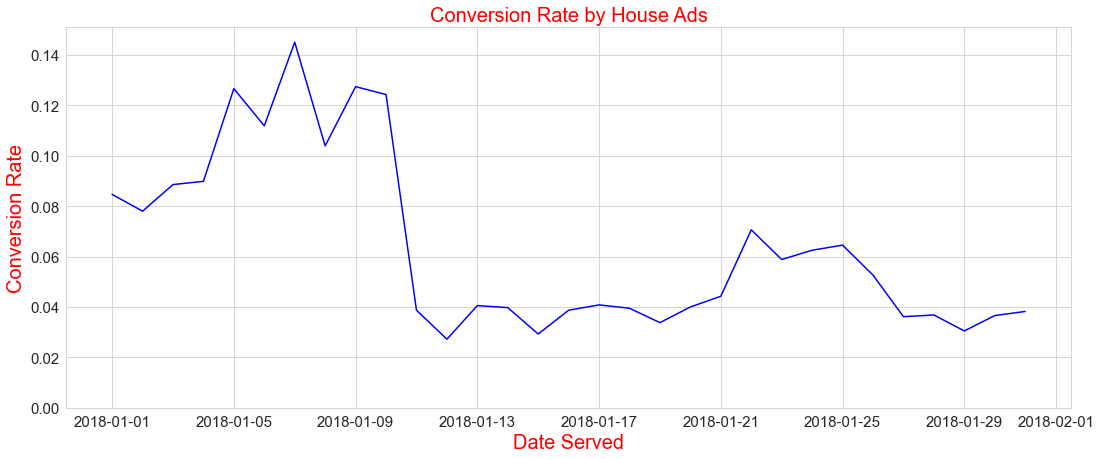

In [49]:
house_ads_df_conversion_rate = df_conversion_rate[df_conversion_rate["marketing_channel"] == "House Ads"]
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_served", y = "users", data = house_ads_df_conversion_rate, color = "blue")
plt.title("Conversion Rate by House Ads", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date Served", size = 20, color = "red")
plt.ylabel("Conversion Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

**Conversion Rate by Instagram**

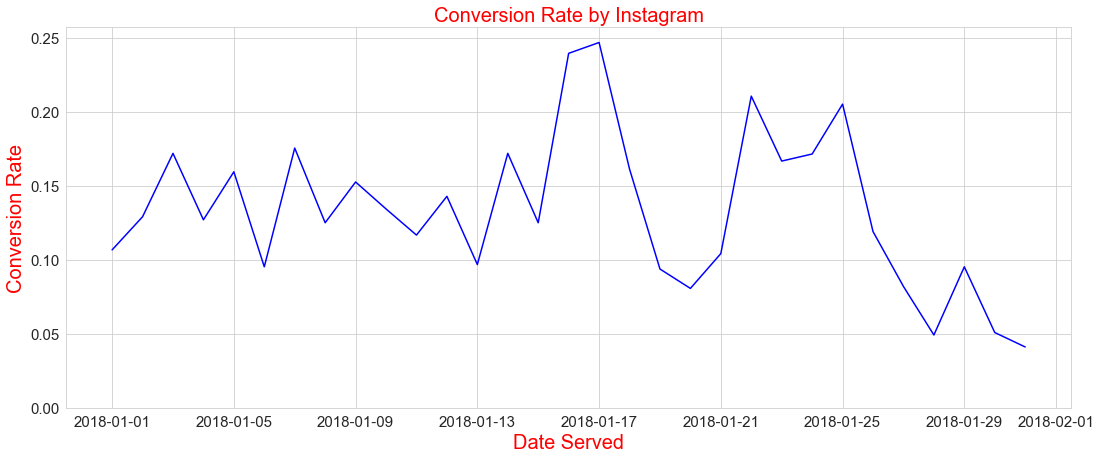

In [50]:
instagram_df_conversion_rate = df_conversion_rate[df_conversion_rate["marketing_channel"] == "Instagram"]
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_served", y = "users", data = instagram_df_conversion_rate, color = "blue")
plt.title("Conversion Rate by Instagram", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date Served", size = 20, color = "red")
plt.ylabel("Conversion Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

**Conversion Rate by Push**

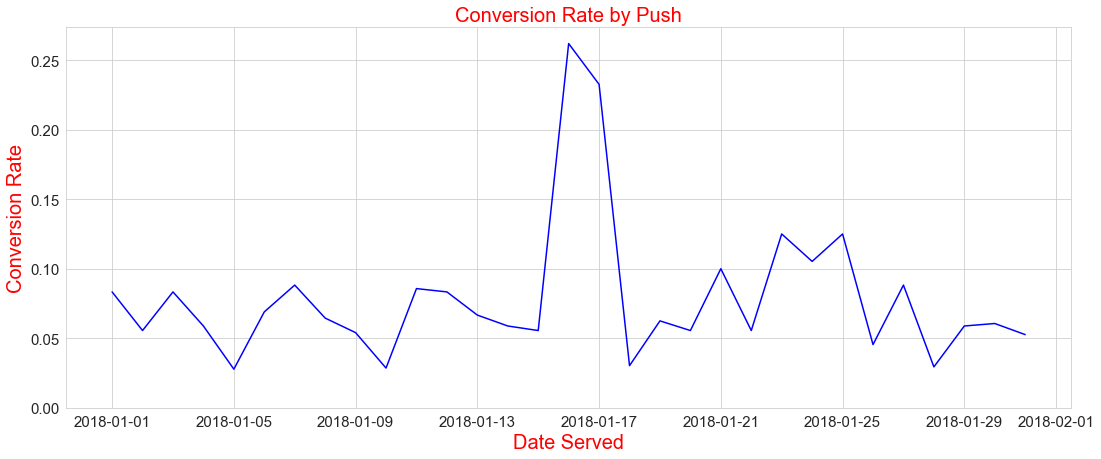

In [51]:
push_df_conversion_rate = df_conversion_rate[df_conversion_rate["marketing_channel"] == "Push"]
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date_served", y = "users", data = push_df_conversion_rate, color = "blue")
plt.title("Conversion Rate by Push", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date Served", size = 20, color = "red")
plt.ylabel("Conversion Rate", size = 20, color = "red")
plt.ylim(0)
plt.show()

### Conversion Rate by Days of Week

In [52]:
df["Day"] = df["date_served"].dt.dayofweek
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,is_correct_language,day_served,Day
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0


In [53]:
people = df.groupby(["Day", "marketing_channel"])["user_id"].nunique()

converted_people = df[df["converted"] == True].groupby(["Day", "marketing_channel"])["user_id"].nunique()

conversion_rate = converted_people / people

df_conversion_rate = conversion_rate.to_frame().reset_index()
df_conversion_rate.columns = ["Day", "marketing_channel", "users"]
df_conversion_rate

,Day,marketing_channel,users
0,0.0,Email,0.162621
1,0.0,Facebook,0.119601
2,0.0,House Ads,0.062660
3,0.0,Instagram,0.122517
4,0.0,Push,0.064516
5,1.0,Email,0.906250
6,1.0,Facebook,0.147887
7,1.0,House Ads,0.070312
8,1.0,Instagram,0.151943
9,1.0,Push,0.115854


### House Ads Conversion by Language

In [54]:
house_mar = df[df["marketing_channel"] == "House Ads"]
house_mar.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,is_correct_language,day_served,Day
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0


In [55]:
people = house_mar.groupby(["date_served", "language_displayed"])["user_id"].nunique()
people_converted = house_mar[house_mar["converted"] == True].groupby(["date_served", "language_displayed"])["user_id"].nunique()

conversion_ha = people_converted / people
conversion_ha_df = conversion_ha.to_frame().reset_index()
conversion_ha_df.columns = ["date_served", "language_displayed", "users"]
pd.pivot_table(conversion_ha_df, index = "date_served", columns = "language_displayed", values = "users")

language_displayed,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,1.0,0.075145,0.200000,NaN
2018-01-02,NaN,0.068966,0.600000,NaN
2018-01-03,NaN,0.083799,0.333333,0.125000
2018-01-04,NaN,0.080537,NaN,0.214286
2018-01-05,NaN,0.118881,NaN,0.214286
2018-01-06,1.0,0.087591,NaN,0.200000
2018-01-07,1.0,0.117647,1.000000,0.125000
2018-01-08,NaN,0.079710,0.500000,0.200000
2018-01-09,NaN,0.129252,NaN,0.100000


In [56]:
house_mar["is_correct_lang"] = np.where(house_mar["language_displayed"] == house_mar["language_preferred"], "Yes", "No")
house_mar.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,is_correct_language,day_served,Day,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,Yes,0.0,0.0,Yes


In [57]:
language_check = house_mar.groupby(["date_served", "is_correct_lang"])["is_correct_lang"].count().to_frame()
language_check.columns = ["count"]
language_check = language_check.fillna(0).reset_index()
df_language_check = pd.pivot_table(language_check, index = "date_served", columns = "is_correct_lang", values = "count")
df_language_check["pct"] = (df_language_check["Yes"] / df_language_check.sum(axis = 1)).round(2)
df_language_check

is_correct_lang,No,Yes,pct
date_served,,,
2018-01-01,2.0,189.0,0.99
2018-01-02,3.0,247.0,0.99
2018-01-03,NaN,220.0,1.00
2018-01-04,NaN,168.0,1.00
2018-01-05,NaN,160.0,1.00
2018-01-06,1.0,151.0,0.99
2018-01-07,2.0,130.0,0.98
2018-01-08,NaN,154.0,1.00
2018-01-09,NaN,157.0,1.00


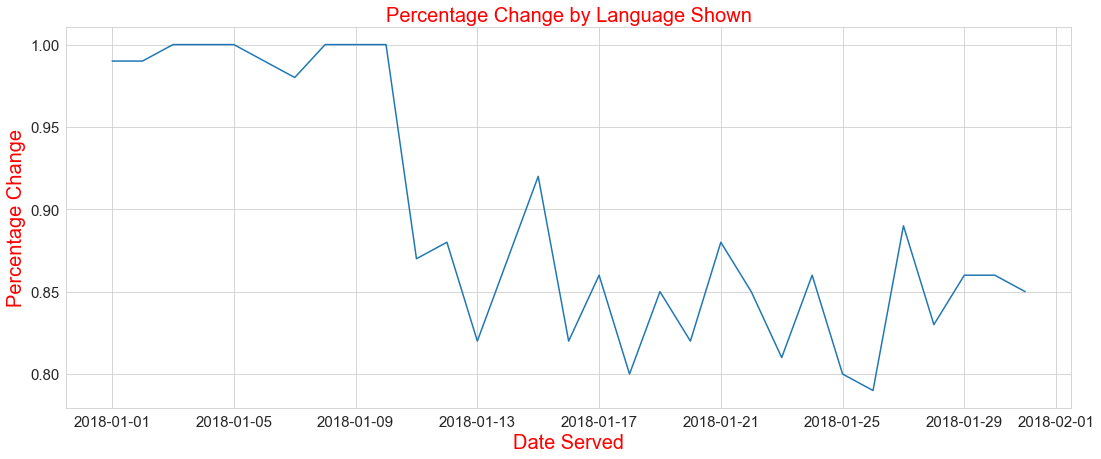

In [58]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = df_language_check.index, y = "pct", data = df_language_check)
plt.title("Percentage Change by Language Shown", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date Served", size = 20, color = "red")
plt.ylabel("Percentage Change", size = 20, color = "red")
plt.show()

### A/B testing for Marketing

In [59]:
email = df[df["marketing_channel"] == "Email"]
allocation = email.groupby("variant")["user_id"].nunique()
allocation

variant
control            270
personalization    284
Name: user_id, dtype: int64

In [62]:
subscribers = email.groupby(["user_id", "variant"])["converted"].max()
subscribers = pd.DataFrame(subscribers.unstack(level = 1))
subscribers.head()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


In [63]:
# Drop rows from control
control = subscribers["control"].dropna()
personalization = subscribers["personalization"].dropna()

In [65]:
print("Control Conversion Rate =", control.mean().round(2), "\n")

print("Personalization Conversion Rate =", personalization.mean().round(2))

Control Conversion Rate = 0.28 

Personalization Conversion Rate = 0.39


**Calculate Lift**

In [67]:
a_mean = np.mean(control)
b_mean = np.mean(personalization)

lift = (b_mean - a_mean) / a_mean
print(lift)

0.3885285396590065


**T-Test**

In [69]:
t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)
